# 시그모이드 함수 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x)) # exp : 지수함수

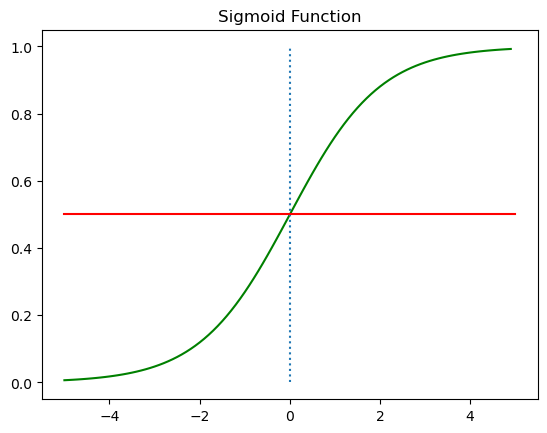

In [3]:
# w의 값에 따라 경사도가 변한다.
# 주어진 데이터에 가장 적합한 w와 b를 구하는 것이 목적
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[0,1],':') # 가운데 세로 점선
plt.plot([-5,5],[0.5, 0.5], 'r') # 가운데 가로 실선 (임계선)
plt.title('Sigmoid Function')
plt.show()

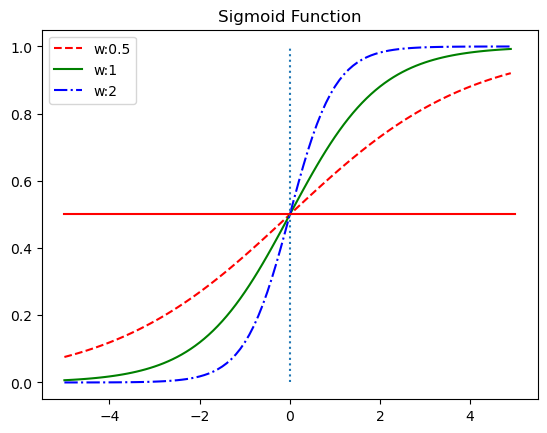

In [8]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(0.5*x) # 기울기가 0.5
y2 = sigmoid(1.0 * x)
y3 = sigmoid(2 * x)

plt.plot(x,y1,'r--', label='w:0.5')
plt.plot(x,y2,'g', label='w:1')
plt.plot(x,y3,'b-.', label='w:2')

plt.plot([0,0],[0,1],':') # 가운데 세로 점선
plt.plot([-5,5],[0.5, 0.5], 'r') # 가운데 가로 실선 (임계선)
plt.legend()
plt.title('Sigmoid Function')
plt.show()

# 유방암 판별 예측 

## 패키지 로딩

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [5]:
breast = load_breast_cancer()
# print(breast.DESCR)
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
display(df.head())
print(df.shape)
print(df['target'].value_counts())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 31)
target
1    357
0    212
Name: count, dtype: int64


In [6]:
# print(df.isna().sum())
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## 종속변수/독립변수 선택

In [7]:
x = breast.data
y = breast.target

## 데이터 스케일링 

In [8]:
scaled_x = StandardScaler().fit_transform(x) 

## 학습 데이터/평가 데이터 분리

In [9]:
# 분류 : 학습/평가 데이터의 비율이 종속 변수 데이터의 비율과 같아야 함
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=0, stratify = y)
# stratify : 학습과 평가 데이터 분리시 종속 변수의 클래스별 비율을 고려해서 분리

In [23]:
unique, counts = np.unique(y_train, return_counts=True) # return_counts : count 값도 함께 가져옴
print(dict(zip(unique, counts)))

{0: 148, 1: 250}


## 모델 생성
- 회귀계수 최적화 옵션
    - solver : 최적화 문제에 사용할 알고리즘
    >- 'lbfgs' : solver의 기본값, CPU 코어 수가 많다면 최적화를 병렬로 수행할 수 있다.
    >- 'liblinear' : 작은 데이터에 적합한 알고리즘
    >- 'sag', 'saga' : 확률적경사하강법을 기반으로 한 알고리즘으로 대용량 데이터에 적합
    >- 'newton-cg', 'sag', 'saga', 'linlinear'만 다항 손실을 처리할 수 있다. 즉, 멀티클래스 분류 모델에 사용 가능
    - solver에 따른 규제 지원 사항
    >- newton-cg, lbfgs, sag: L2
    >- liblinear, saga : L1, L2
    - multi_class : 다중클래스분류 문제의 상황에서 접근방식을 지정
    >- 'ovr' : 이진분류문제인 sigmoid 함수를 이용하여 결과 예측
    >- 'multinomial' : 각 클래스에 대한 softmax 확률값으로 다중분류를 수행
    - C: 규제 강도의 역수, C의 값이 작을수록 규제 강도가 커지고 모델이 단순해진다.
    - max_iter: solver가 수렴하는데 필요한 반복 횟수 (default:100)

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 모델 예측

In [11]:
y_hat = model.predict(x_test)
print(y_hat[:20])
print(y_test[:20])

[0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


## Confusion Matrix
- 혼동 행렬 함수는 행을 True(실제 상황), 열을 Predict(예측 상황)값으로 이용하고 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값의 정렬된 순서로 사용한다. (0:Negative, 1:Positive)
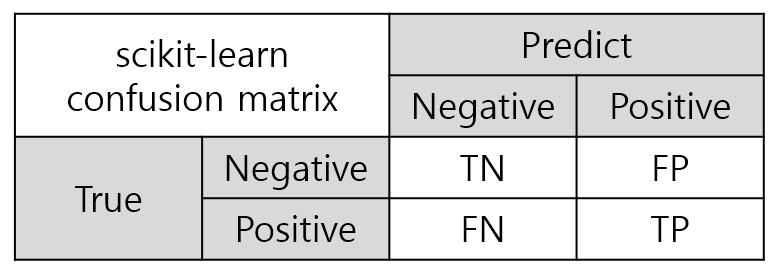

In [12]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[ 61   3]
 [  4 103]]


## 평가지표

In [38]:
accuracy = accuracy_score(y_test, y_hat)
print(f'정확도:{accuracy:.2f}') # (61+103) / (61+3+4+103)
precision = precision_score(y_test, y_hat)
print(f'정밀도:{precision:.2f}') # 103 / (3+103)
recall = recall_score(y_test, y_hat)
print(f'재현율: {recall:.2f}') # 103 / (4+103)
pred_proba_positive = model.predict_proba(x_test)[:,1] # positive로 예측한 확률값 취합
# print(pred_proba_positive[:4])
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_positive)
roc_data = pd.DataFrame(np.concatenate([fpr.reshape(-1,1), tpr.reshape(-1,1), thresholds.reshape(-1,1)], axis=1), columns=['FPR','TPR','THRESHOLDS']) # 행 벡터를 열 벡터로 만들어줌 
display(roc_data)
auc = roc_auc_score(y_test, pred_proba_positive)
print(f'AUC:{auc:.6f}')

정확도:0.96
정밀도:0.97
재현율: 0.96


,FPR,TPR,THRESHOLDS
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.009346,9.999997e-01
2,0.000000,0.897196,9.059276e-01
3,0.015625,0.897196,9.033250e-01
4,0.015625,0.915888,8.819721e-01
5,0.031250,0.915888,8.745867e-01
6,0.031250,0.953271,6.018401e-01
7,0.046875,0.953271,5.372206e-01
8,0.046875,0.971963,4.930703e-01
9,0.062500,0.971963,4.322792e-01


AUC:0.995619


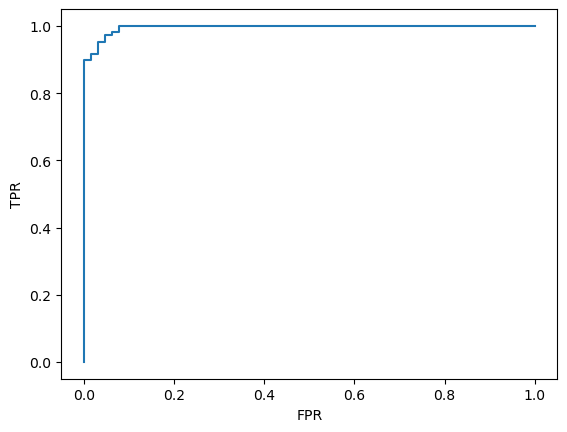

In [37]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 최적의 임계값 찾기
- TPR(실제 양성을 양성이라고 판단한 비율)과 FPR(음성을 양성이라고 잘못 판단한 위양성율)의 차이가 가장 큰 경우의 임계치가 최적의 임계값이라고 할 수 있다.

In [14]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print(f'최적의 임계값: {optimal_threshold:.3f}')

최적의 임계값: 0.493


## 예측 확률
- 평가 데이터의 각 레코드별 개별 클래스 예측 확률값 확인
- 분류 임계값 : 0.5

In [42]:
prob = model.predict_proba(x_test)
prob_df = pd.DataFrame(np.concatenate([np.round(prob[:10],3), y_hat[:10].reshape(-1,1)], axis=1), columns=['negative(0)','positive(1)','predict class'])
print(prob_df)

   negative(0)  positive(1)  predict class
0        1.000        0.000            0.0
1        0.125        0.875            1.0
2        0.999        0.001            0.0
3        0.015        0.985            1.0
4        1.000        0.000            0.0
5        0.037        0.963            1.0
6        1.000        0.000            0.0
7        1.000        0.000            0.0
8        0.994        0.006            0.0
9        1.000        0.000            0.0


## 임계값 변화에 따른 재현율과 정밀도 변환 확인

In [46]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
    return np.where(prob >= threshold, 1, 0) # 참이면 1 거짓이면 0

pred_1 = threshold_filter(pred_proba_positive, 0.5) # 임계값 0.5
pred_2 = threshold_filter(pred_proba_positive, 0.6) # 임계값 0.6
pred_3 = threshold_filter(pred_proba_positive, 0.8) # 임계값 0.8

print('======= Threshold: 0.5 =======')
print(classification_report(y_test, pred_1))
print('======= Threshold: 0.6 =======')
print(classification_report(y_test, pred_2))
print('======= Threshold: 0.8 =======')
print(classification_report(y_test, pred_3))

======= Threshold: 0.5 =======
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

======= Threshold: 0.6 =======
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.98      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

======= Threshold: 0.8 =======
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.98      0.93      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95  

## solver별 성능평가 비교

In [49]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    pred_proba_positive = model.predict_proba(x_test)[:,1]
    print(f'solver:{solver}, accuracy:{accuracy_score(y_test, y_hat):.3f}, auc:{roc_auc_score(y_test, pred_proba_positive):.3f}')

solver:lbfgs, accuracy:0.959, auc:0.996
solver:liblinear, accuracy:0.959, auc:0.996
solver:newton-cg, accuracy:0.959, auc:0.996
solver:sag, accuracy:0.959, auc:0.996
solver:saga, accuracy:0.959, auc:0.996


# [실습] 개인 신용도를 기반으로 대출 가능여부 예측하기

# 개인 신용도 예측

## 패키지 로딩

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [71]:
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 로드 및 확인

In [74]:
df_loan = pd.read_csv('./datasets/Personal_Loan.csv')
print(df_loan.shape)
display(df_loan.head())

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 데이터 전처리

### 컬럼 제거

In [75]:
df_loan.drop(['ID','ZIP Code'], axis =1, inplace = True )

In [76]:
df_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 독립변수/종속변수 분리

In [77]:
x = df_loan.drop('Personal Loan', axis = 1)
y = df_loan['Personal Loan']

## 데이터 스케일링 

In [78]:
scaled_x = StandardScaler().fit_transform(x)

## 학습 데이터/평가 데이터 분리

In [79]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=0, stratify = y)

## 모델 생성
- 로지스틱 회귀 모형의 가중치 해석
>- 로지스틱 회귀 모형의 가중치는 지수변환(exp()을 취한다)을 해주면 odds비가 나온다. (오즈비 = 성공할 확률 / 실패할 확률)
>- 대출 여부에 영향을 미치는 변수의 오즈비가 1보다 큰 경우 대출이 승인되는데 높은 비율로 영향을 미친다고 해석할 수 있다.
>- ex) Income 컬럼의 오즈비가 12인 경우 소득에 따라 대출이 승인될 확률이 대출이 거부될 확률보다 12배 높다는 의미이다.

In [84]:
model = LogisticRegression(max_iter = 2000)
model.fit(x_train, y_train)

coef = model.coef_.squeeze(axis=0) # squeeze : 차원축소
print('추정 계수(가중치):',coef) # 11개의 독립변수에 대한 가중치값 
# 분류 모형의 가중치는 odds비로 변환해야 함
odds_rate = np.exp(model.coef_).squeeze(axis = 0)
print('추정 계수(Odds비):',odds_rate)
coef_df = pd.DataFrame({'가중치':coef, 'Odds비':odds_rate}, index = x.columns)
print(coef_df)

추정 계수(가중치): [-0.22480373  0.33712955  2.49269246  0.77553498  0.19167452  1.41140133
 -0.02953423 -0.31021898  0.89839435 -0.30621769 -0.52708743]
추정 계수(Odds비): [ 0.79867296  1.40092054 12.09379436  2.17175366  1.2112762   4.1016992
  0.97089765  0.73328637  2.45565703  0.73622634  0.59032182]
                         가중치      Odds비
Age                -0.224804   0.798673
Experience          0.337130   1.400921
Income              2.492692  12.093794
Family              0.775535   2.171754
CCAvg               0.191675   1.211276
Education           1.411401   4.101699
Mortgage           -0.029534   0.970898
Securities Account -0.310219   0.733286
CD Account          0.898394   2.455657
Online             -0.306218   0.736226
CreditCard         -0.527087   0.590322


In [86]:
print(df_loan[df_loan['Personal Loan']==0]['Income'].mean()) # 0 : 대출 거부
print(df_loan[df_loan['Personal Loan']==1]['Income'].mean()) # 1: 대출 승인 

66.23738938053097
144.74583333333334


In [87]:
print(df_loan[df_loan['Personal Loan']==0]['Education'].mean()) # 0 : 대출 거부
print(df_loan[df_loan['Personal Loan']==1]['Education'].mean()) # 1: 대출 승인 

1.8435840707964601
2.2333333333333334


## 모델 예측

In [89]:
y_hat = model.predict(x_test)
print('실제값:', y_test[:20].values) # values 안 찍으면 시리즈로 찍혀서 np의 다차원 배열로 다시 변환
print('예측값:', y_hat[:20])

실제값: [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0]
예측값: [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


## 모델 성능 측정

Predict         
                대출 불허(0) 대출 승인(1)
Actual 대출 불허(0)     1335       21
       대출 승인(1)       55       89

정확도: 0.949
정밀도 : 0.809


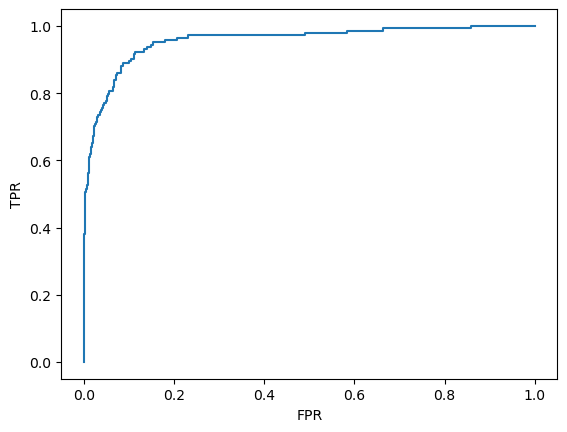

AUC : 0.957


In [99]:
cf = confusion_matrix(y_test, y_hat)
cf_df = pd.DataFrame(cf, index = [['Actual','Actual'],['대출 불허(0)','대출 승인(1)']], columns=[['Predict','Predict'],['대출 불허(0)','대출 승인(1)']])
display(cf_df)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(f'정밀도 : {precision_score(y_test, y_hat):.3f}')
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print(f'AUC : {roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.3f}')

## 교차검증

In [103]:
scores = cross_validate(model, scaled_x, y, cv=10, scoring=['accuracy','precision','roc_auc']) # scoring : 교차 검증의 평가지표
# print(scores)
for key, val in scores.items():
    print('평가지표:', key)
    print(f'평균값: {np.mean(val):.3f}')
# fit_time : 학습에 걸린 시간, score_time : 평가하는데 걸린 시간 
# accuracy 값 비교했을 때 같음 -> 과적합된 모델이 아님 

평가지표: fit_time
평균값: 0.014
평가지표: score_time
평균값: 0.004
평가지표: test_accuracy
평균값: 0.950
평가지표: test_precision
평균값: 0.812
평가지표: test_roc_auc
평균값: 0.958


## 학습이 완료된 모델을 파일로 저장

In [104]:
import joblib
joblib.dump(model, './loan.pkl') # 모델 학습 결과를 pickle 파일로 저장
# 학습해서 만들어낸 가중치가 저장됨

['./loan.pkl']

## 파일 불러오기

In [105]:
loaded_model = joblib.load('./loan.pkl')
score = loaded_model.score(x_test, y_test)
print(score)

0.9493333333333334
